In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qulacs import QuantumState
from qulacs import Observable
from qulacs import QuantumCircuit
from qulacs import ParametricQuantumCircuit
from qulacs.gate import DenseMatrix,RY,RZ,RX
import math
import cmath

In [2]:
nqubit = 2

In [3]:
n_mesh = 100
x = np.linspace(0., 2*math.pi, n_mesh)
y = np.linspace(0., 2*math.pi, n_mesh)
xx,yy = np.meshgrid(x,y)
yy
z = np.zeros((n_mesh,n_mesh))

In [12]:
def U_encode_gate(x1,x2):
    U = QuantumCircuit(nqubit)
    
    for i in range(nqubit):
        U.add_H_gate(i)
    U.add_RZ_gate(0,x1)
    U.add_RZ_gate(1,x2)
    for i in range(nqubit):
        U.add_H_gate(i) 
    theta = (math.pi - x1)*(math.pi - x2)
    for i in range(nqubit):
        U.add_RZ_gate(i,theta)
    return U

beta = math.pi*2*np.random.rand(2)
gamma = math.pi*2*np.random.rand(2)
delta = math.pi*2*np.random.rand(2)

def encode_state(x1,x2):
    state = QuantumState(nqubit)
    state.set_zero_state()
    u = U_encode_gate(x1,x2)
    u.update_quantum_state(state)
    for i in range(2):
        ry_gate1 = RX(i,beta[i])
        ry_gate1.update_quantum_state(state)
        rz_gate = RY(i,gamma[i])
        rz_gate.update_quantum_state(state)
        ry_gate2 = RX(i,delta[i])
        ry_gate2.update_quantum_state(state)
        
    return state

In [13]:
from qulacs import Observable
obs = Observable(nqubit)
obs.add_operator(1., 'Z 0 Z 1')

def get_e_value(state):
    return obs.get_expectation_value(state)

In [14]:
get_e_value(encode_state(0.5,0.5))

-0.5578043852605314

In [15]:
nditer = np.nditer(z, flags=['multi_index'])

In [16]:
a_class_index = []
b_class_index = []

In [17]:
while not nditer.finished:
    #print(nditer.multi_index)
    z[nditer.multi_index] = get_e_value(encode_state(xx[nditer.multi_index],yy[nditer.multi_index]))
    if z[nditer.multi_index] > 0.2:
        a_class_index.append(nditer.multi_index)
    elif z[nditer.multi_index] < 0.2:
        b_class_index.append(nditer.multi_index)
    nditer.iternext()

In [18]:
#cont = plt.contour(x,y,z,colors=['black'])
#plt.show()

/home/sakai2030/anaconda3/envs/Qulacs/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


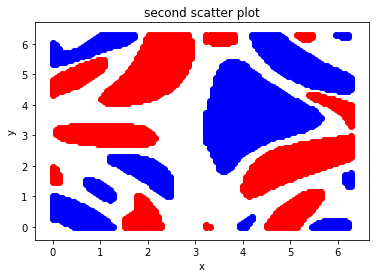

In [19]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(xx[z>0.2],yy[z>0.2], c='red')
ax.scatter(xx[z<-0.2],yy[z<-0.2], c='blue')

ax.set_title('second scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()